# 1 金字塔图

Pyramid Chart，用于展示层级关系的可视化图表，类似金字塔，如人口结构、市场份额，销售数据、组织架构等，用于需要突出数据比例、分布、层级关系的场景


## 1.1 适用场景

- 人口统计：不同年龄段的性别比例
- 市场分析：比较不同类别的销售占比
- 组织结构：用于企业的管理层级展示
- 销售漏斗：转化率情况



## 1.2 sns.barplot


参数

- data:
- x:
- y:
- color:设置颜色
- label:设置标签
- xticks:设置x轴刻度


## 1.3 示例

### 1.3.1 基本示例

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joypy
import warnings

# 忽略警告
warnings.filterwarnings('ignore')
tips = sns.load_dataset('tips')
tips
# 一个分类变量，两个数值变量

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='tips', ylabel='day'>

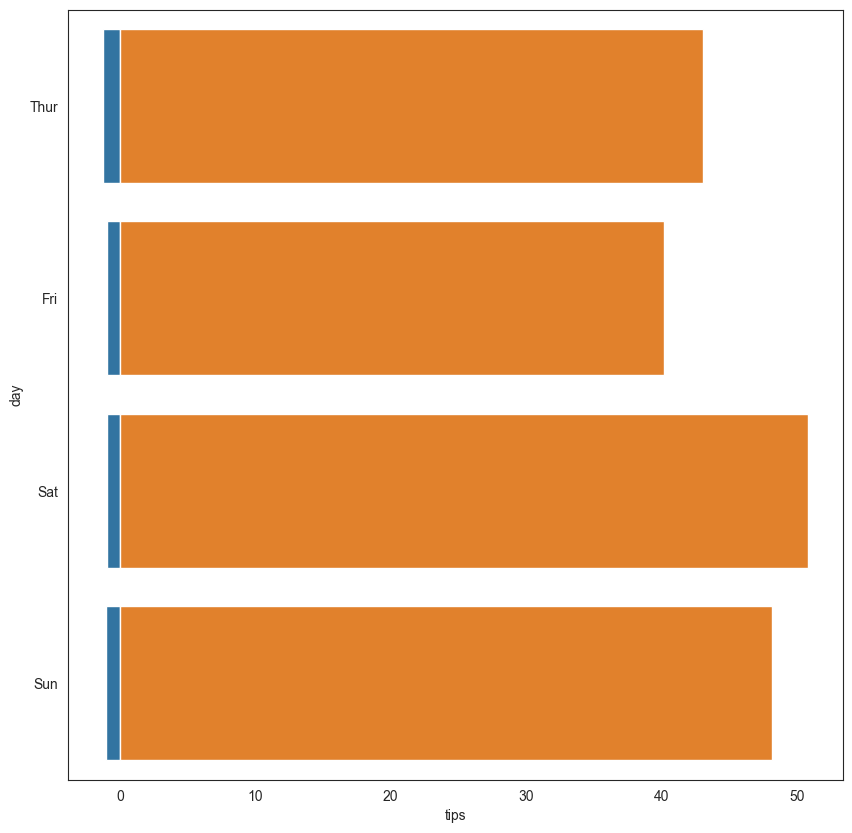

In [7]:
sns.set_style("white")
plt.figure(figsize=(10,10))
# 将其中一个变量取反，关键
tips['tips'] = - tips['tip']

# 将柱状图按照两部分分别绘制
# 将分类变量和数值变量对换位置
sns.barplot(data=tips, x='tips', y='day',estimator='max',errorbar=None)
sns.barplot(data=tips, x='total_bill', y='day',estimator='max',errorbar=None)

### 1.3.2 color设置颜色

颜色清单

![](../picture/B-kdeplot-1.png)

### 1.3.3 label设置标签

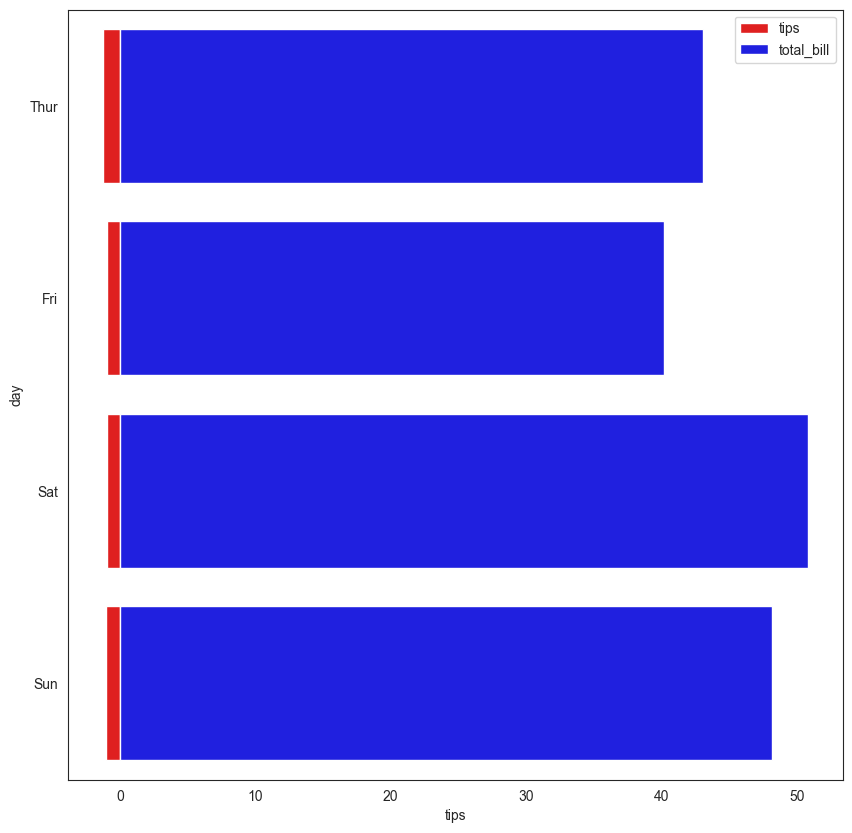

In [8]:
sns.set_style("white")
plt.figure(figsize=(10,10))
# 将其中一个变量取反，关键
tips['tips'] = - tips['tip']

# 将柱状图按照两部分分别绘制
# 将分类变量和数值变量对换位置
sns.barplot(data=tips, x='tips', y='day',estimator='max',errorbar=None,color='red',label='tips')
sns.barplot(data=tips, x='total_bill', y='day',estimator='max',errorbar=None,color='blue',label='total_bill')

plt.legend()

### 1.3.4 xticks设置x轴标签刻度


plt.xticks(ticks,labels)

- ticks：刻度的位置（绘制图表的原始数据的值）
- labels：刻度的标签（绘制图表的原始数据的值映射的标签）

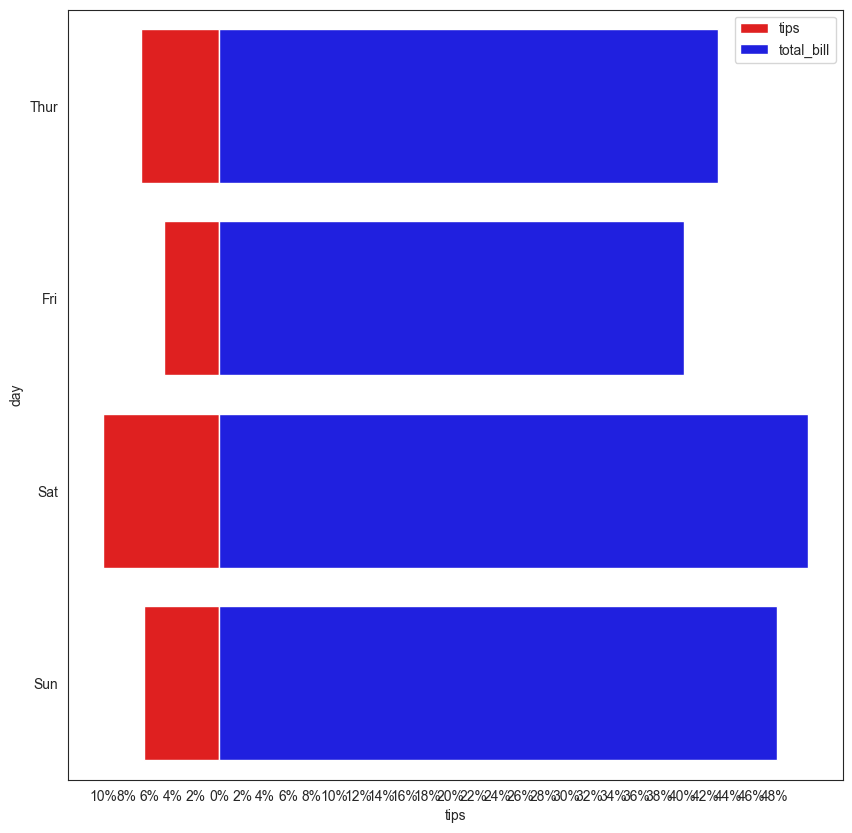

In [14]:
sns.set_style("white")
plt.figure(figsize=(10,10))
# 各组取最大值
tips = tips.groupby('day')[['tip','total_bill']].max()
tips.reset_index(inplace=True)
# 将其中一个变量取反，关键
tips['tips'] = - tips['tip']

# 将柱状图按照两部分分别绘制
# 将分类变量和数值变量对换位置
sns.barplot(data=tips, x='tips', y='day',estimator='max',errorbar=None,color='red',label='tips')
sns.barplot(data=tips, x='total_bill', y='day',estimator='max',errorbar=None,color='blue',label='total_bill')

plt.legend()


# 设置x轴刻度
ticks = range(-10,50,2)
plt.xticks(ticks=ticks,labels= [f"{abs(x)}%" for x in ticks])
plt.show()

### 1.3.5 对每条数据添加数据标签


plt.text()
![](../picture/B-pyramidplot-1.png)

In [13]:
tips.groupby('day')[['tip','total_bill']].max()

,tip,total_bill
day,,
Thur,6.70,43.11
Fri,4.73,40.17
Sat,10.00,50.81
Sun,6.50,48.17


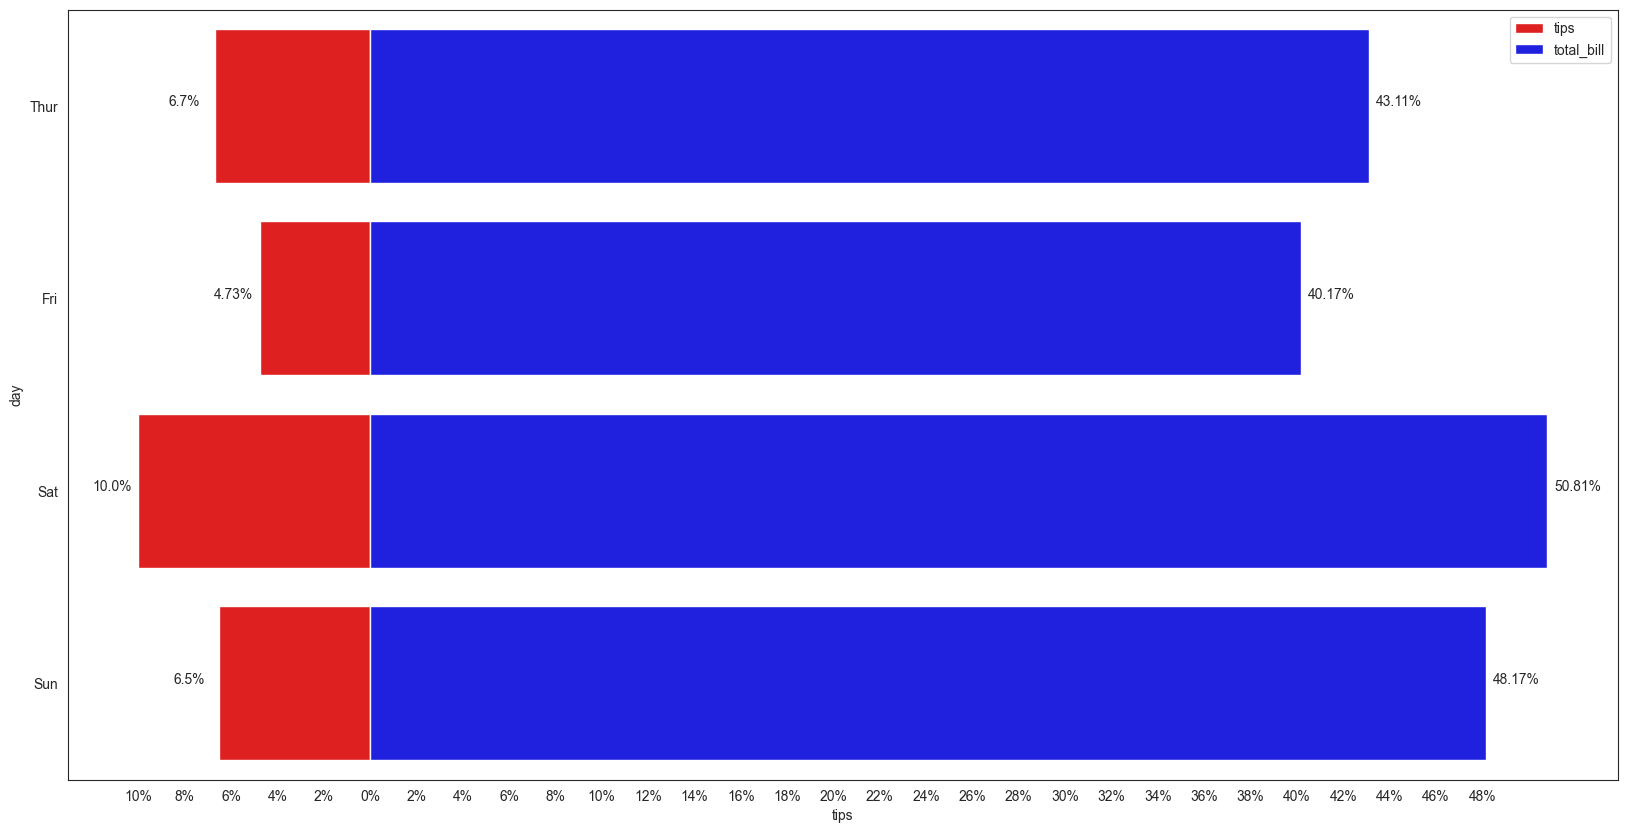

In [19]:
sns.set_style("white")
plt.figure(figsize=(20,10))
# 各组取最大值
tips = tips.groupby('day')[['tip','total_bill']].max()
tips.reset_index(inplace=True)
# 将其中一个变量取反，关键
tips['tips'] = - tips['tip']

# 将柱状图按照两部分分别绘制
# 将分类变量和数值变量对换位置
sns.barplot(data=tips, x='tips', y='day',estimator='max',errorbar=None,color='red',label='tips')
sns.barplot(data=tips, x='total_bill', y='day',estimator='max',errorbar=None,color='blue',label='total_bill')

plt.legend()

# 添加数据标签
# x,y,data
for i in range(len(tips)):
    plt.text(tips['total_bill'][i] + 0.3, i, f"{tips['total_bill'][i]}%")
    plt.text(tips['tips'][i] - 2, i, f"{tips['tip'][i]}%")

# 设置x轴刻度
ticks = range(-10,50,2)
plt.xticks(ticks=ticks,labels= [f"{abs(x)}%" for x in ticks])
plt.show()